In [1]:
from __future__ import division, print_function
%matplotlib inline
import sys
sys.path.insert(0,'..') # allow us to format the book
sys.path.insert(0,'../code') # allow us to format the book
sys.path.insert(0,'./code') # allow us to format the book

# use same formatting as rest of book so that the plots are
# consistant with that look and feel.
#import book_format
#book_format.load_style('..')

This notebook creates the animations for the Multivariate Kalman Filter chapter. It is not really intended to be a readable part of the book, but of course you are free to look at the source code, and even modify it. However, if you are interested in running your own animations, I'll point you to the examples subdirectory of the book, which contains a number of python scripts that you can run and modify from an IDE or the command line. This module saves the animations to GIF files, which is quite slow and not very interactive. 

In [2]:
import filterpy.stats as stats
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


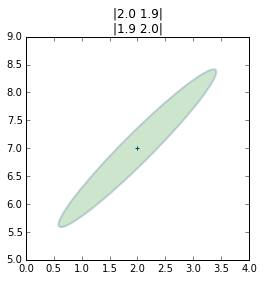

In [6]:
import numpy as np
#import mkf_internal
import matplotlib.pyplot as plt
from gif_animate import animate

def ellipse_animate(frame):
    
    plt.cla()
    cov = frame/15.
    P = np.array([[2,cov],[cov,2]])
    stats.plot_covariance_ellipse((2,7), cov=P, facecolor='g', alpha=0.2, 
                              title='|2.0 {:.1f}|\n|{:.1f} 2.0|'.format(cov, cov))
fig = plt.figure()
animate('multivariate_ellipse.gif', ellipse_animate, 30, 125, figsize=(4, 4))

<img src='multivariate_ellipse.gif'>

In [16]:
f.Q

array([[ 0.0025,  0.005 ],
       [ 0.005 ,  0.01  ]])

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


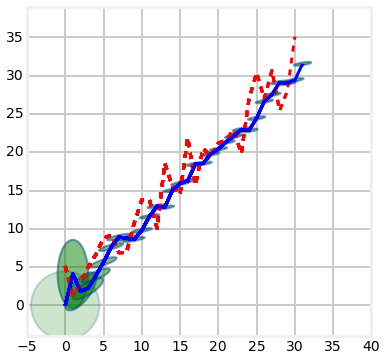

In [6]:
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from gif_animate import animate
import numpy.random as random
from DogSimulation import DogSimulation
import filterpy.stats
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import KalmanFilter
import book_format
book_format.load_style('..')

def dog_tracking_filter(R, Q=0, cov=1.):
    dog_filter = KalmanFilter(dim_x=2, dim_z=1)
    dog_filter.x = np.array([0, 0])   # initial state (location and velocity)
    dog_filter.F = np.array([[1.,1],
                             [0,1]])  # state transition matrix
    dog_filter.H = np.array([[1.,0]])  # Measurement function
    dog_filter.R *= R                 # measurement uncertainty
    dog_filter.P *= cov               # covariance matrix 
    if np.isscalar(Q):
        dog_filter.Q = Q_discrete_white_noise(2, var=Q)
    else:
        dog_filter.Q = Q
    return dog_filter

R = 5.
Q = .01
noise = 2.
P = 20.
dog = DogSimulation(measurement_var=R, process_var=Q)
f = dog_tracking_filter(R=R, Q=Q, cov=P)
random.seed(200)
zs = []
xs = []
def animate_track(frame):
    if frame > 30: return
    
    if frame == 0:
        stats.plot_covariance_ellipse((0, f.x[0]), cov=f.P, axis_equal=True, 
                                      facecolor='g', edgecolor=None, alpha=0.2)
        xs.append(f.x[0])
        
    z = dog.move_and_sense()[1]

    zs.append(z)
    f.update(z)
    xs.append(f.x[0])
    
    stats.plot_covariance_ellipse((frame+1, f.x[0]), cov=f.P, axis_equal=True, 
                                   facecolor='g', edgecolor=None, alpha=0.5,
                                   xlim=(-5,40), ylim=(-5,40))
    
    plt.plot(zs, color='r', linestyle='dashed')
    plt.plot(xs, color='b')
    f.predict()

animate('multivariate_track1.gif', animate_track, 37, 200, figsize=(5.5, 5.5))

<img src='multivariate_track1.gif'>